# Volatility and Maximum Drawdown

In this notebook, you will learn how to calculate volatility and maximum drawdown. The notebook is divided into the following parts.

1. [Read Price Data](#read)
2. [Calculate Volatility](#volatility)
3. [Calculate Drawdown](#drawdown)

### Import libraries

In [16]:
# For the data manipulation
import numpy as np 
import pandas as pd

# For plotting 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn-darkgrid')

<a id='read'></a>
### Read Price Data

The closing price of SPY EFT and TSLA stock are stored in a CSV file in a CSV file. This is the daily data starting from 2015-01-01 to 2021-01-01. You can view the data in folder '**data_modules**' . Alternatively, you can also download the price data from Yahoo! Finance.

To read the csv file, you can use the `read_csv` method of pandas. The syntax is shown below.

Syntax:
```
    import pandas as pd
    pd.read_csv(filename, index_col)
```

Parameters:
- filename: Name of the file in the string format
- index_col: Column number to set as index

Returns:
- Dataframe

In [17]:
# Read the price data 
price_data = pd.read_csv('data_modules/price_data_2010_2021.csv', index_col=0)

# Convert the index to dataframe 
price_data.index = pd.to_datetime(price_data.index)

price_data.head()

,SPY,TSLA
Date,,
2014-12-31,205.539993,44.481998
2015-01-02,205.429993,43.862000
2015-01-05,201.720001,42.018002
2015-01-06,199.820007,42.256001
2015-01-07,202.309998,42.189999


<a id='volatility'></a>
### Calculate Volatility

Volatility is measured as the standard deviation of the returns. Therefore, to get the volatility of a security, you need to calculate daily returns of security and the standard deviation of the returns.

To calculate daily returns, we will use the `pct_change` method of pandas.

Syntax
```
    DataFrame.pct_change()
```

Returns:
- DataFrame

In [18]:
# Calculate daily returns of SPY and Tesla
price_data['spy_daily_returns'] =  price_data['SPY'].pct_change()
price_data['tsla_daily_returns'] = price_data['TSLA'].pct_change()
price_data.head()


,SPY,TSLA,spy_daily_returns,tsla_daily_returns
Date,,,,
2014-12-31,205.539993,44.481998,NaN,NaN
2015-01-02,205.429993,43.862000,-0.000535,-0.013938
2015-01-05,201.720001,42.018002,-0.018060,-0.042041
2015-01-06,199.820007,42.256001,-0.009419,0.005664
2015-01-07,202.309998,42.189999,0.012461,-0.001562


#### Calculate standard deviation of returns 
We will calculate the rolling standard deviation of the daily returns using the `rolling` and `std` methods.

Syntax:
```
    DataFrame.rolling(window).std()
```

Parameters:
- window: lookback period for which you want to calculate rolling standard deviation

Returns:
- DataFrame

In [19]:
# Calculate rolling standard deviation of SPY and TSLA
price_data['spy_volatility'] = price_data['spy_daily_returns'].rolling(252).std()
price_data['tsla_volatility'] =  price_data['tsla_daily_returns'].rolling(252).std()

# Drop NaN values
price_data = price_data.dropna()

In [20]:
price_data

,SPY,TSLA,spy_daily_returns,tsla_daily_returns,spy_volatility,tsla_volatility
Date,,,,,,
2015-12-31,203.869995,48.001999,-0.010003,0.008064,0.009811,0.024470
2016-01-04,201.020004,44.681999,-0.013979,-0.069164,0.009851,0.024845
2016-01-05,201.360001,44.686001,0.001691,0.000090,0.009785,0.024700
2016-01-06,198.820007,43.807999,-0.012614,-0.019648,0.009800,0.024730
2016-01-07,194.050003,43.130001,-0.023992,-0.015477,0.009884,0.024750
...,...,...,...,...,...,...
2021-05-24,419.170013,606.440002,0.010194,0.044002,0.010797,0.046202
2021-05-25,418.239990,604.690002,-0.002219,-0.002886,0.010778,0.046205
2021-05-26,419.070007,619.130005,0.001985,0.023880,0.010744,0.046217


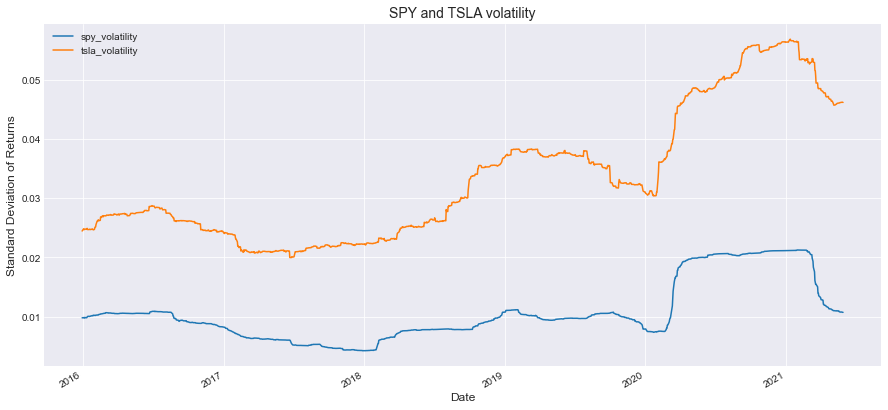

In [21]:
# Plot Volatility of SPY and Tesla
price_data[['spy_volatility', 'tsla_volatility']].plot(figsize=(15,7))

# Set the titel and axes labels
plt.title('SPY and TSLA volatility', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Standard Deviation of Returns', fontsize=12)
plt.show()

The above chart shows that Tesla stock returns have large variation compared to the SPY ETF returns. Hence, you can say that Tesla stock is more volatile than SPY ETF.

Also, around March 2020, volatility in both securities have increased drastically. This is due to the COVID-19 pandemic. Whenever there is uncertainty in the market, the volatility increases

<a id='drawdown'></a>
## Calculate Drawdown

Maximum drawdown informs the maximum loss of a trading systems. Drawdown can be measured as the loss of a value from its peak. The peak value at any given time is calculated using the running maximum value.

Drawdoen is given by the below formula:

$$ Drawdown = (\frac{value} {Running~maximum~vale}) * 100 $$

In python, we will use `maximum` and `accumulate` methods to calculate the peak or running maximum value of a series over a period

Syntax:
```
    numpy.maximum.accumulate()
```

Returns:
- The running maximum value of a series from the past period

In [22]:
def calc_drawdown(price):
    # Calculate the running maximum
    running_max = np.maximum.accumulate(price.dropna())

    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1

    # Calculate the drawdown 
    drawdown = (price)/running_max - 1
    return drawdown 


def plot_drawdown(drawdown, grap_title):

    # Plot drawdown 
    plt.figure(figsize=(15, 7))
    drawdown.plot(color = 'r')
    plt.ylabel('Drawdown', fontsize=12)
    plt.xlabel('Year-Month', fontsize=12)
    plt.title(grap_title, fontsize=14)
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.grid(which='major', color='k', linestyle = '-.', linewidth=0.2)

    plt.show()

The maximum drawdown of SPY is -34.10


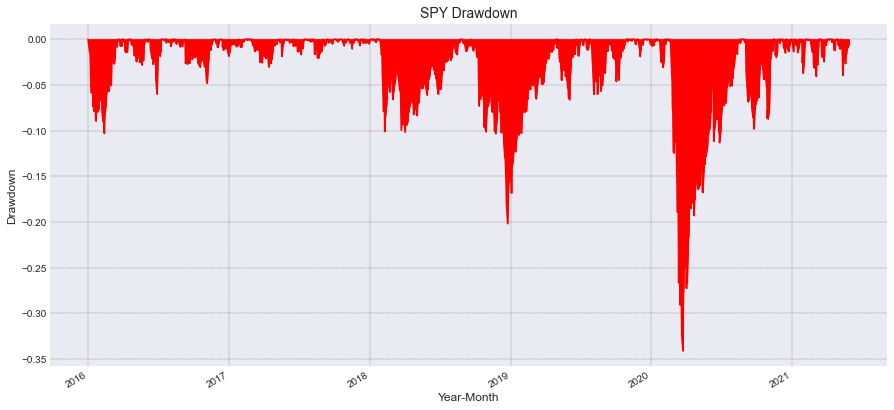

In [23]:
# Calculte drawdown of SPY 
drawdown_spy = calc_drawdown(price_data['SPY'])

# Calculate maximum drawdown of SPY 
max_dd_spy = drawdown_spy.min()*100
print("The maximum drawdown of SPY is %.2f" % max_dd_spy)

# Plot SPY drawdown
plot_drawdown(drawdown_spy, 'SPY Drawdown')

The maximum drawdown of TSLA is -60.63


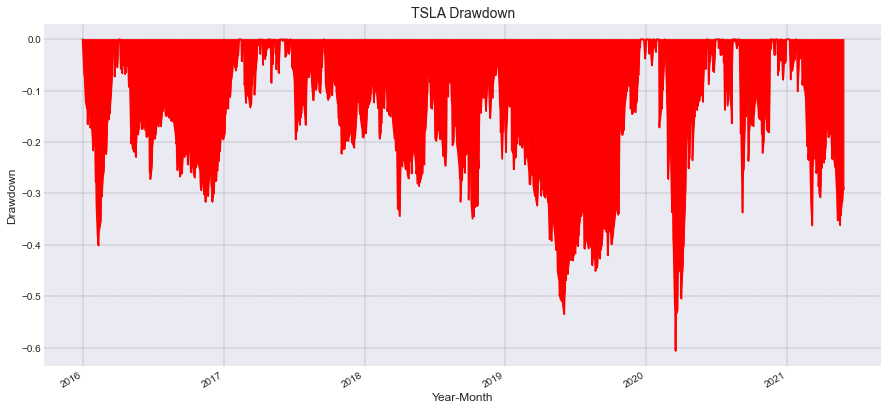

In [24]:
# Calculte drawdown of TSLE
drawdown_tsla = calc_drawdown(price_data['TSLA'])

# Calculate maximum drawdown of SPY 
max_dd_tsla = drawdown_tsla.min()*100
print("The maximum drawdown of TSLA is %.2f" % max_dd_tsla)

# Plot SPY drawdown
plot_drawdown(drawdown_tsla, 'TSLA Drawdown')

From the above output, you can conclude that the maximum drawdown of the TSLA stock is more that the SPY ETF. This means that investing in TSLA stock is riskier than the SPY

In the upcoming section, you will learn to create a trading strategy and calculate its volatility, maximum drawdown and other performance metrics